In [ ]:
!pip install -U cade
!pip install git+https://github.com/valedica/gensim.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 3.5 MB/s 
     |████████████████████████████████| 132 kB 30.5 MB/s 
     |████████████████████████████████| 79 kB 4.5 MB/s 
     |████████████████████████████████| 9.0 MB 37.3 MB/s 
     |████████████████████████████████| 139 kB 9.3 MB/s 
     |████████████████████████████████| 127 kB 38.3 MB/s 
  Created wheel for smart-open: filename=smart_open-1.10.0-py3-none-any.whl size=90641 sha256=2fe7f275cf919fed1625e43b1dbd41c2693807bbda9b6619e77e73e58ee28070
  Stored in directory: /root/.cache/pip/wheels/1f/e5/fc/7412935a7184efc8ad377e948c81b1cc99b6a02eb8dc7c918c
Successfully built smart-open
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.2.1
    Uninstalling s

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper/') 

# CADE 2001 + 2002-2006

In [ ]:
!cat file9600.txt file1619.txt > pre_2016_compass.txt

In [ ]:
# train the compass

from cade.cade import CADE
from gensim.models.word2vec import Word2Vec
aligner_post = CADE(size=100)

aligner_post.train_compass("pre_2016_compass.txt", overwrite=False)

Training the compass from scratch.


/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# train the slices

slice_pre2001 = aligner_post.train_slice("file9600.txt", save=False)
slice_2016_2019 = aligner_post.train_slice("file1619.txt", save=False)

Training embeddings: slice file9600.txt.


/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Initializing embeddings from compass.
Training embeddings: slice file1619.txt.
Initializing embeddings from compass.


In [ ]:
from scipy.spatial.distance import cosine
print(1 - cosine(slice_pre2001.wv["attack"], slice_2016_2019.wv["attack"]))

0.8377854824066162


## Slice 2001 - Most Similar words for a word

In [ ]:
# slice_pre2001.wv.most_similar("al-qaeda")

In [ ]:
slice_pre2001.wv.most_similar("bin-laden")

[('osama', 0.8689126968383789),
 ('razick', 0.7532216310501099),
 ('yousef', 0.7414078116416931),
 ('ahmed', 0.735292911529541),
 ('posada', 0.708109974861145),
 ('zardari', 0.70682692527771),
 ('salah', 0.6894359588623047),
 ('terrorist', 0.6850748062133789),
 ('abouhalima', 0.6801888942718506),
 ('terrorists', 0.679653525352478)]

In [ ]:
slice_pre2001.wv.most_similar("airplane")

[('plane', 0.788498044013977),
 ('jet', 0.7764148116111755),
 ('airplanes', 0.7627463340759277),
 ('cockpit', 0.7449500560760498),
 ('aboard', 0.7187333106994629),
 ('aircraft', 0.7163975238800049),
 ('planes', 0.7145206928253174),
 ('piloting', 0.7040852308273315),
 ('cessna', 0.6916729211807251),
 ('flight', 0.6878440380096436)]

In [ ]:
slice_pre2001.wv.most_similar("twin-towers")

[('courtland', 0.7596021890640259),
 ('ireton', 0.7533807754516602),
 ('maumee', 0.7527971267700195),
 ('lux', 0.749416708946228),
 ('catlett', 0.748465895652771),
 ('petrov', 0.7481261491775513),
 ('kerwin', 0.7335833311080933),
 ('lanham', 0.7335383892059326),
 ('inglewood', 0.7330092787742615),
 ('utley', 0.7327793836593628)]

In [ ]:
slice_pre2001.wv.most_similar("tower")

[('towers', 0.7482728362083435),
 ('elevators', 0.6532323956489563),
 ('eiffel', 0.6422375440597534),
 ('overlooking', 0.6301757097244263),
 ('hillside', 0.611736536026001),
 ('atrium', 0.6093537211418152),
 ('terrace', 0.6045181751251221),
 ('perched', 0.5903153419494629),
 ('adjacent', 0.5869299173355103),
 ('skyline', 0.5827518701553345)]

In [ ]:
slice_pre2001.wv.most_similar("terrorism")

[('terrorists', 0.7894580364227295),
 ('terrorist', 0.764297366142273),
 ('genocide', 0.712723970413208),
 ('combating', 0.666199266910553),
 ('violence', 0.6447898745536804),
 ('atrocities', 0.6313457489013672),
 ('warfare', 0.6277074813842773),
 ('cooperation', 0.6251220703125),
 ('militias', 0.6221076250076294),
 ('balkans', 0.6206527948379517)]

In [ ]:
slice_pre2001.wv.most_similar("world-trade-center")

[('bombing', 0.7514325976371765),
 ('yousef', 0.7378929257392883),
 ('riyadh', 0.7238483428955078),
 ('ramzi', 0.6859226226806641),
 ('bombings', 0.6793161630630493),
 ('mastermind', 0.6728912591934204),
 ('ismoil', 0.6483030319213867),
 ('embassy', 0.6356743574142456),
 ('tanzania', 0.6224731802940369),
 ('bomb', 0.6217224597930908)]

In [ ]:
slice_pre2001.wv.most_similar("attack")

[('attacks', 0.7989825010299683),
 ('bombings', 0.6019506454467773),
 ('attacking', 0.5859698057174683),
 ('attacked', 0.5805792212486267),
 ('assassinations', 0.5624566078186035),
 ('airstrikes', 0.5592142343521118),
 ('shelling', 0.5553872585296631),
 ('terrorist', 0.5326471328735352),
 ('bombers', 0.5310761332511902),
 ('bombing', 0.5305243134498596)]

In [ ]:
slice_pre2001.wv.most_similar("hijacked") 

# 'hijacker',
#  'hijackings',
#  'hijackers',
#  'hijack',
#  'hijacks',
#  'hijacking',
#  'hijacked',
#  'hijack',
#  'hijacks',
#  'hijacking'

[('stealth', 0.6569526195526123),
 ('downed', 0.6542422771453857),
 ('chartered', 0.6340481638908386),
 ('parachuting', 0.6308789253234863),
 ('piloted', 0.6172972917556763),
 ('rammed', 0.6008818745613098),
 ('hijacking', 0.6007275581359863),
 ('hijackers', 0.599128246307373),
 ('piloting', 0.5925400257110596),
 ('cockpits', 0.5863230228424072)]

In [ ]:
slice_pre2001.wv.most_similar("firefighter")

[('firefighters', 0.6287490725517273),
 ('sergeant', 0.6178207397460938),
 ('paramedics', 0.6162399649620056),
 ('fireman', 0.5808717012405396),
 ('capt', 0.5681346654891968),
 ('policeman', 0.5401451587677002),
 ('smit', 0.523013174533844),
 ('ambulance', 0.5205057263374329),
 ('officer', 0.5199959874153137),
 ('fire', 0.5132117867469788)]

In [ ]:
slice_pre2001.wv.most_similar("afghanistan")

[('taliban', 0.8680800199508667),
 ('kashmir', 0.8232223987579346),
 ('serbian', 0.8222663402557373),
 ('serb', 0.8109080195426941),
 ('hutu', 0.801619827747345),
 ('yugoslavia', 0.8012076616287231),
 ('afghan', 0.7982165813446045),
 ('rwanda', 0.7974294424057007),
 ('somalia', 0.7934905886650085),
 ('kurdish', 0.7920215725898743)]

In [ ]:
slice_pre2001.wv.most_similar("islam")

[('judaism', 0.7987688779830933),
 ('christianity', 0.7875682711601257),
 ('muslim', 0.7697911262512207),
 ('farrakhan', 0.7649487257003784),
 ('buddhists', 0.7447178363800049),
 ('hindu', 0.7446775436401367),
 ('fundamentalist', 0.7424752712249756),
 ('extremists', 0.7415294647216797),
 ('secular', 0.7353293299674988),
 ('christians', 0.7307169437408447)]

In [ ]:
slice_pre2001.wv.most_similar("jihad")

[('militants', 0.8122283220291138),
 ('insurgency', 0.7602031230926514),
 ('fundamentalists', 0.7542295455932617),
 ('hamas', 0.7502573728561401),
 ('hizbullah', 0.7480473518371582),
 ('fundamentalist', 0.7463306188583374),
 ('militant', 0.7444331049919128),
 ('insurgents', 0.7373145818710327),
 ('algeria', 0.7292364835739136),
 ('shiite', 0.7177733182907104)]

## Slice post 2001 - Most Similar words for a word

In [ ]:
slice_2016_2019.wv.most_similar("al-qaeda")

[('isil', 0.8177404403686523),
 ('nusra', 0.8170340061187744),
 ('hamas', 0.7936007976531982),
 ('militant', 0.7867713570594788),
 ('militias', 0.7816616296768188),
 ('isis', 0.780814528465271),
 ('hezbollah', 0.777328610420227),
 ('kurdish', 0.7743266820907593),
 ('abu', 0.7698302268981934),
 ('shiite', 0.7693774104118347)]

In [ ]:
slice_2016_2019.wv.most_similar("bin-laden")

[('osama', 0.9278737902641296),
 ('mullah', 0.7301687002182007),
 ('hussein', 0.7006357312202454),
 ('mansoor', 0.6764886379241943),
 ('al-qaeda', 0.6657758951187134),
 ('abdel', 0.6583453416824341),
 ('sheikh', 0.6571474075317383),
 ('dictator', 0.656914472579956),
 ('mohammed', 0.6550155878067017),
 ('saddam', 0.6519150733947754)]

In [ ]:
slice_2016_2019.wv.most_similar("airplane")

[('plane', 0.7773397564888),
 ('jet', 0.7521093487739563),
 ('planes', 0.7293540835380554),
 ('flight', 0.7069438695907593),
 ('flying', 0.7044507265090942),
 ('pilots', 0.7022885680198669),
 ('aircraft', 0.7000541687011719),
 ('aboard', 0.699860155582428),
 ('hangar', 0.6987643241882324),
 ('cockpit', 0.690040111541748)]

In [ ]:
slice_2016_2019.wv.most_similar("twin-towers")

[('brownstone', 0.7053417563438416),
 ('multistory', 0.694652259349823),
 ('petronas', 0.6894090175628662),
 ('furnace', 0.688947319984436),
 ('cabinetry', 0.6688922047615051),
 ('cavernous', 0.6670055389404297),
 ('girders', 0.6647077798843384),
 ('gawking', 0.662477433681488),
 ('masts', 0.6617116928100586),
 ('withstand', 0.6610323190689087)]

In [ ]:
slice_2016_2019.wv.most_similar("tower")

[('towers', 0.7276509404182434),
 ('condominium', 0.6126450896263123),
 ('penthouse', 0.6102077960968018),
 ('world-trade-center', 0.5643448233604431),
 ('floors', 0.561313271522522),
 ('plaza', 0.5473047494888306),
 ('building', 0.540229082107544),
 ('condo', 0.5379602313041687),
 ('eiffel', 0.5352796912193298),
 ('strongsville', 0.5298925638198853)]

In [ ]:
slice_2016_2019.wv.most_similar("terrorism")

[('terror', 0.7423341274261475),
 ('extremism', 0.6959023475646973),
 ('terrorists', 0.6697547435760498),
 ('terrorist', 0.6525763869285583),
 ('isis', 0.6456528902053833),
 ('atrocities', 0.6416590213775635),
 ('extremist', 0.6211367845535278),
 ('islamist', 0.6132873296737671),
 ('extremists', 0.6028652191162109),
 ('treason', 0.5988501906394958)]

In [ ]:
slice_2016_2019.wv.most_similar("world-trade-center")

[('atomic', 0.6835058331489563),
 ('terminal', 0.643707275390625),
 ('twin-towers', 0.6394681930541992),
 ('bomb', 0.6391026973724365),
 ('towers', 0.6165599822998047),
 ('hydrogen', 0.6136742830276489),
 ('airliner', 0.6107361912727356),
 ('uss', 0.60648512840271),
 ('beam', 0.6013554930686951),
 ('blast', 0.5997208952903748)]

In [ ]:
slice_2016_2019.wv.most_similar("attack")

[('attacks', 0.7571523189544678),
 ('attacked', 0.5949708223342896),
 ('shooting', 0.5668214559555054),
 ('incident', 0.5641507506370544),
 ('bombing', 0.5563468933105469),
 ('massacre', 0.5525786876678467),
 ('gunman', 0.5303240418434143),
 ('suicide', 0.5226010084152222),
 ('gruesome', 0.5194195508956909),
 ('stabbing', 0.5178442001342773)]

In [ ]:
slice_2016_2019.wv.most_similar("hijacked") 

# 'hijacker',
#  'hijackings',
#  'hijackers',
#  'hijack',
#  'hijacks',
#  'hijacking',
#  'hijacked',
#  'hijack',
#  'hijacks',
#  'hijacking'

[('rammed', 0.659808874130249),
 ('bomber', 0.6459121704101562),
 ('plowed', 0.6454650163650513),
 ('detonated', 0.6339178085327148),
 ('commandeered', 0.5932102799415588),
 ('crashed', 0.5930521488189697),
 ('unruly', 0.5906412601470947),
 ('armored', 0.5873671770095825),
 ('slammed', 0.5774819850921631),
 ('targeting', 0.5731509923934937)]

In [ ]:
slice_2016_2019.wv.most_similar("firefighter")

[('rodeman', 0.6855443120002747),
 ('capt', 0.6295799612998962),
 ('firefighters', 0.6277182102203369),
 ('costin', 0.6021670699119568),
 ('sergeant', 0.5940526723861694),
 ('medic', 0.5818159580230713),
 ('hermond', 0.5817208290100098),
 ('diver', 0.5783959031105042),
 ('goodding', 0.5708142518997192),
 ('firemen', 0.5688074827194214)]

In [ ]:
slice_2016_2019.wv.most_similar("afghanistan")

[('iraq', 0.8493082523345947),
 ('troops', 0.7725658416748047),
 ('marines', 0.7708581686019897),
 ('kuwait', 0.7588988542556763),
 ('insurgents', 0.7537829875946045),
 ('afghan', 0.7516798377037048),
 ('bagram', 0.7277868986129761),
 ('taliban', 0.7239471673965454),
 ('army', 0.7206964492797852),
 ('iraqi', 0.7047214508056641)]

In [ ]:
slice_2016_2019.wv.most_similar("islam")

[('muslims', 0.7832956314086914),
 ('radical', 0.756271243095398),
 ('ideology', 0.7434134483337402),
 ('teachings', 0.7393905520439148),
 ('christians', 0.7345974445343018),
 ('quran', 0.7262347936630249),
 ('jihad', 0.7225449085235596),
 ('sect', 0.7165584564208984),
 ('secular', 0.713749885559082),
 ('religion', 0.7127260565757751)]

In [ ]:
slice_2016_2019.wv.most_similar("jihad")

[('extremist', 0.7554532885551453),
 ('extremists', 0.7435877323150635),
 ('shiite', 0.7408501505851746),
 ('islamist', 0.7362117767333984),
 ('militant', 0.7345679998397827),
 ('islam', 0.7225449085235596),
 ('isis', 0.718726396560669),
 ('condemning', 0.708864688873291),
 ('cleric', 0.7065016627311707),
 ('radical', 0.7054531574249268)]

## Word in a Slice - Most similar - same word in the other Slice

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2016_2019["terrorism"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('terrorism', 0.8592912554740906),
 ('terrorists', 0.7262049913406372),
 ('genocide', 0.6990441083908081),
 ('terrorist', 0.6783583164215088),
 ('algeria', 0.6189417839050293),
 ('extremist', 0.6133076548576355),
 ('atrocities', 0.6131678223609924),
 ('neutrality', 0.61112380027771),
 ('corruption', 0.6091103553771973),
 ('combating', 0.6030473709106445)]

In [ ]:
slice_2016_2019.wv.most_similar(positive=[slice_pre2001["terrorism"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('terrorism', 0.8592913150787354),
 ('terror', 0.7246066331863403),
 ('atrocities', 0.6816354990005493),
 ('isis', 0.6678407192230225),
 ('terrorists', 0.6668423414230347),
 ('terrorist', 0.6567685604095459),
 ('libya', 0.646545946598053),
 ('extremism', 0.6363053917884827),
 ('yemen', 0.6311429738998413),
 ('escalation', 0.6267918944358826)]

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2016_2019["twin-towers"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('igniting', 0.7091667652130127),
 ('brickwork', 0.7023501992225647),
 ('spire', 0.6915783882141113),
 ('meteorite', 0.6889317035675049),
 ('cylindrical', 0.6775322556495667),
 ('propellant', 0.6687806844711304),
 ('corrugated', 0.666893720626831),
 ('furnaces', 0.6664576530456543),
 ('edifices', 0.6596968173980713),
 ('alleyways', 0.6577807664871216)]

In [ ]:
slice_2016_2019.wv.most_similar(positive=[slice_pre2001["twin-towers"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('iacocca', 0.7559405565261841),
 ('sandeen', 0.7457833290100098),
 ('chauncey', 0.7445794343948364),
 ('kleber', 0.7437542080879211),
 ('arvidsson', 0.7432868480682373),
 ('idolizes', 0.7391507029533386),
 ('tres', 0.7374227046966553),
 ('concordia', 0.7368610501289368),
 ('balogh', 0.7341557741165161),
 ('hirschberg', 0.7328717708587646)]

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2016_2019["al-qaeda"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('kurdish', 0.7819827795028687),
 ('hamas', 0.769697904586792),
 ('militants', 0.7602903842926025),
 ('pkk', 0.7576377391815186),
 ('hizbullah', 0.7487491369247437),
 ('sayyaf', 0.7485706806182861),
 ('militia', 0.7467132210731506),
 ('lebanese', 0.7408304810523987),
 ('terrorist', 0.735862672328949),
 ('hezbollah', 0.7310370206832886)]

In [ ]:
# slice_2016_2019.wv.most_similar(positive=[slice_pre2001["al-qaeda"]])

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2016_2019["world-trade-center"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('hiroshima', 0.6428353190422058),
 ('hangar', 0.6164437532424927),
 ('bomb', 0.6109473705291748),
 ('atomic', 0.6071626543998718),
 ('ordnance', 0.5992182493209839),
 ('uss', 0.59619140625),
 ('exploded', 0.5953208804130554),
 ('jetliners', 0.5919324159622192),
 ('blast', 0.5902608633041382),
 ('decrepit', 0.5898793339729309)]

In [ ]:
slice_2016_2019.wv.most_similar(positive=[slice_pre2001["world-trade-center"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('bombing', 0.6799217462539673),
 ('bombings', 0.6509285569190979),
 ('istanbul', 0.6176525354385376),
 ('blasts', 0.6122767925262451),
 ('terror', 0.6026284694671631),
 ('abedi', 0.6022204756736755),
 ('baghdad', 0.6021636128425598),
 ('nairobi', 0.5897727012634277),
 ('airliner', 0.5790270566940308),
 ('brussels', 0.578793466091156)]

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2016_2019["fundamentalism"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('template', 0.6170757412910461),
 ('anachronism', 0.6095545291900635),
 ('irrelevancy', 0.5954785346984863),
 ('jakub', 0.5880486965179443),
 ('kashmiriat', 0.586656928062439),
 ('sinhalese', 0.5709189176559448),
 ('rong', 0.5699483156204224),
 ('eurocentric', 0.5659686923027039),
 ('greeks', 0.559066653251648),
 ('meteoric', 0.5584492087364197)]

In [ ]:
slice_2016_2019.wv.most_similar(positive=[slice_pre2001["fundamentalism"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('sect', 0.7930644750595093),
 ('christianity', 0.7498937249183655),
 ('sunni', 0.7299587726593018),
 ('radical', 0.7260554432868958),
 ('islam', 0.7222532033920288),
 ('teachings', 0.7202576398849487),
 ('shiite', 0.7196204662322998),
 ('islamist', 0.7162834405899048),
 ('secular', 0.7137324810028076),
 ('jihad', 0.7125526666641235)]

In [ ]:
slice_2016_2019.wv.most_similar(positive=[slice_pre2001["hijacked"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('tarmac', 0.620010495185852),
 ('ataturk', 0.6038679480552673),
 ('squadron', 0.6036515831947327),
 ('jetliner', 0.59856116771698),
 ('hijacked', 0.5978710055351257),
 ('metrojet', 0.5920863747596741),
 ('kokuka', 0.5854530334472656),
 ('aboard', 0.5850823521614075),
 ('manned', 0.5845276117324829),
 ('lockerbie', 0.581011176109314)]

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2016_2019["hijacked"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('hijacked', 0.597870945930481),
 ('transports', 0.596279501914978),
 ('hijackers', 0.5955246686935425),
 ('armored', 0.5850696563720703),
 ('dispatched', 0.5806393027305603),
 ('hijacking', 0.5805264711380005),
 ('bomber', 0.5795837640762329),
 ('libyan', 0.5762673616409302),
 ('collided', 0.5759575366973877),
 ('sla', 0.5737658143043518)]

In [ ]:
slice_2016_2019.wv.most_similar(positive=[slice_pre2001["attack"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('attack', 0.8377853631973267),
 ('attacks', 0.7350444197654724),
 ('attacked', 0.5655025243759155),
 ('suicide', 0.5634819865226746),
 ('bombing', 0.5520843863487244),
 ('gruesome', 0.5348106622695923),
 ('assad', 0.526880145072937),
 ('bombings', 0.526329517364502),
 ('bin-laden', 0.5072597861289978),
 ('terrorist', 0.5056667327880859)]

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2016_2019["attack"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('attack', 0.8377854824066162),
 ('attacks', 0.7165091037750244),
 ('bombings', 0.6061399579048157),
 ('bombing', 0.5749157071113586),
 ('bomb', 0.5429315567016602),
 ('attacked', 0.5389904975891113),
 ('incident', 0.5363346338272095),
 ('killings', 0.5335520505905151),
 ('terrorist', 0.5316424369812012),
 ('blast', 0.5202484726905823)]

In [ ]:
slice_2016_2019.wv.most_similar(positive=[slice_pre2001["airplane"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('airplane', 0.8392799496650696),
 ('plane', 0.7781820297241211),
 ('planes', 0.7591094970703125),
 ('cockpit', 0.7394436597824097),
 ('pilots', 0.7171179056167603),
 ('jet', 0.7087490558624268),
 ('flight', 0.7051101922988892),
 ('aircraft', 0.6962599754333496),
 ('passengers', 0.6909180879592896),
 ('attendants', 0.6765706539154053)]

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2016_2019["airplane"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('airplane', 0.8392798900604248),
 ('jet', 0.7670057415962219),
 ('plane', 0.7352941632270813),
 ('piloting', 0.7059638500213623),
 ('cessna', 0.69356369972229),
 ('flight', 0.6880055069923401),
 ('aboard', 0.6815401315689087),
 ('taxied', 0.6800446510314941),
 ('spaceship', 0.6799802780151367),
 ('airplanes', 0.6794365644454956)]

In [ ]:
slice_2016_2019.wv.most_similar(positive=[slice_pre2001["islam"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('islam', 0.8513414859771729),
 ('christianity', 0.7467888593673706),
 ('christians', 0.7315061092376709),
 ('muslims', 0.7262650728225708),
 ('sect', 0.7160787582397461),
 ('secular', 0.7081129550933838),
 ('ideology', 0.7042553424835205),
 ('teachings', 0.6900025606155396),
 ('muslim', 0.6889253854751587),
 ('radical', 0.6842666268348694)]

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2016_2019["islam"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('islam', 0.8513414859771729),
 ('judaism', 0.7731325626373291),
 ('christianity', 0.7520156502723694),
 ('extremists', 0.7503728866577148),
 ('buddhists', 0.7416986227035522),
 ('believers', 0.7331250905990601),
 ('secular', 0.7294172048568726),
 ('fundamentalist', 0.7293736934661865),
 ('fundamentalism', 0.7222532033920288),
 ('fundamentalists', 0.7168740034103394)]

In [ ]:
slice_2016_2019.wv.most_similar(positive=[slice_pre2001["jihad"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('extremists', 0.7731401324272156),
 ('terrorists', 0.7605953812599182),
 ('jihad', 0.7562631368637085),
 ('extremist', 0.7371983528137207),
 ('shiite', 0.7284224629402161),
 ('islamist', 0.7131483554840088),
 ('cleric', 0.7085176110267639),
 ('al-qaeda', 0.701214075088501),
 ('isis', 0.6910164952278137),
 ('hamas', 0.6904571652412415)]

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2016_2019["jihad"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('militant', 0.7991887331008911),
 ('hamas', 0.7946428060531616),
 ('fundamentalists', 0.7774799466133118),
 ('hizbullah', 0.7663666009902954),
 ('militants', 0.7601277828216553),
 ('fundamentalist', 0.7570081353187561),
 ('jihad', 0.7562631368637085),
 ('extremists', 0.7508767247200012),
 ('uprising', 0.7339003086090088),
 ('extremist', 0.7277776002883911)]

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2016_2019["bin-laden"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('bin-laden', 0.6886230707168579),
 ('osama', 0.669816255569458),
 ('shah', 0.6633564829826355),
 ('abdel', 0.6591772437095642),
 ('amaru', 0.6567547917366028),
 ('ahmed', 0.6553134918212891),
 ('kuwait', 0.6530709266662598),
 ('mohammed', 0.6523853540420532),
 ('hostages', 0.6492782235145569),
 ('terrorists', 0.6451767683029175)]

In [ ]:
slice_2016_2019.wv.most_similar(positive=[slice_pre2001["bin-laden"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('osama', 0.771920919418335),
 ('spies', 0.7174097299575806),
 ('al-qaeda', 0.7040666341781616),
 ('bin-laden', 0.6886230707168579),
 ('whelan', 0.6806376576423645),
 ('khalid', 0.6714507341384888),
 ('informant', 0.6686708927154541),
 ('mohammed', 0.6583825349807739),
 ('spy', 0.6553069353103638),
 ('moscow', 0.6518526077270508)]

In [ ]:
slice_pre2001.wv.most_similar(positive=[slice_2016_2019["afghanistan"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('bosnia', 0.7323615550994873),
 ('army', 0.7315282821655273),
 ('generals', 0.7061529755592346),
 ('beirut', 0.6943694353103638),
 ('civilian', 0.683078408241272),
 ('okinawa', 0.6784493923187256),
 ('somalia', 0.6751459836959839),
 ('chechnya', 0.6722305417060852),
 ('rwandan', 0.6699931621551514),
 ('massoud', 0.6666287183761597)]

In [ ]:
slice_2016_2019.wv.most_similar(positive=[slice_pre2001["afghanistan"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('syrian', 0.8315634727478027),
 ('libya', 0.8054567575454712),
 ('rebels', 0.7974701523780823),
 ('insurgents', 0.7942246198654175),
 ('egypt', 0.7822386026382446),
 ('separatists', 0.7822062969207764),
 ('kurdish', 0.7815436124801636),
 ('pakistan', 0.7813628911972046),
 ('taliban', 0.7717971801757812),
 ('militias', 0.7713002562522888)]

## Slice 2001 vs Slice post 2001 - Similarity between keywords

In [ ]:
slice_pre2001.wv.similarity("airplane", 'twin-towers')

0.07924489

In [ ]:
slice_2016_2019.wv.similarity("airplane", "twin-towers")

0.47056127

In [ ]:
slice_pre2001.wv.similarity("airplane", 'hijacked')

0.5523477

In [ ]:
slice_2016_2019.wv.similarity("airplane", 'hijacked')

0.36286938

In [ ]:
slice_pre2001.wv.similarity("attack", 'world-trade-center')

0.34088558

In [ ]:
slice_2016_2019.wv.similarity("attack", 'world-trade-center')

0.2506421

In [ ]:
slice_pre2001.wv.similarity("firefighter", 'terrorist')

0.042565845

In [ ]:
slice_2016_2019.wv.similarity("firefighter", 'terrorist')

-0.03808025

In [ ]:
slice_pre2001.wv.similarity("bin-laden", 'terrorists')

0.64210993

In [ ]:
slice_2016_2019.wv.similarity("bin-laden", 'terrorists')

0.5694563

In [ ]:
# slice_pre2001.wv.similarity("al-qaeda", 'terrorists')

In [ ]:
slice_2016_2019.wv.similarity("al-qaeda", 'terrorists')

0.64230245

In [ ]:
slice_pre2001.wv.similarity("collapse", 'tower')

0.054103874

In [ ]:
slice_2016_2019.wv.similarity("collapse", 'tower')

0.16332689

## Slice 2001 - Plot most similar words to a list of words

In [ ]:
keys = ['terrorism', 'twin-towers', 'airplane', 'world-trade-center']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in slice_pre2001.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(slice_pre2001[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


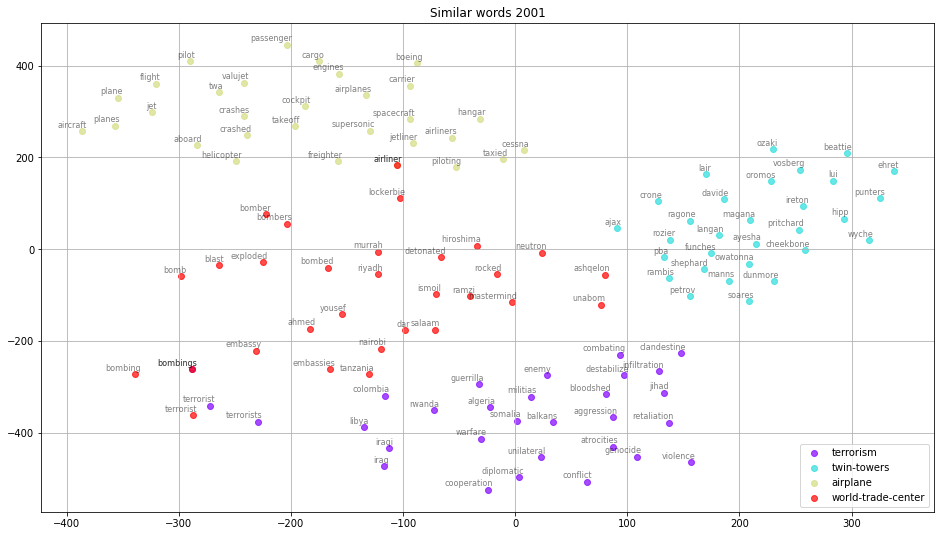

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words 2001', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_CADE2001.png')

## Slice post 2001 - Plot most similar words to a list of words

In [ ]:
keys = ['terrorism', 'twin-towers', 'airplane', 'world-trade-center']


embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in slice_2016_2019.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(slice_2016_2019[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


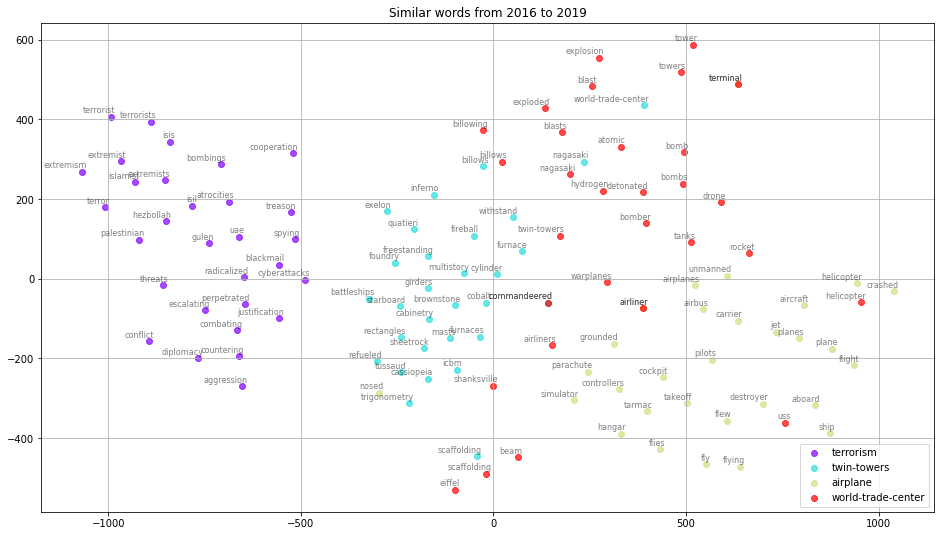

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from 2016 to 2019', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_CADE_post2001.png')

## Plot contextual variability

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def context_var(words, embedding):
  
  X = embedding[words]
  pca = PCA(n_components=2)
  
  emb_pca = pca.fit_transform(X)

  plt.scatter(emb_pca[:, 0], emb_pca[:, 1])

  for id, word in enumerate(words):
    # annotate
    plt.annotate(word, xy=(emb_pca[id, 0], emb_pca[id, 1]))
  plt.xticks([])
  plt.yticks([])  

  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


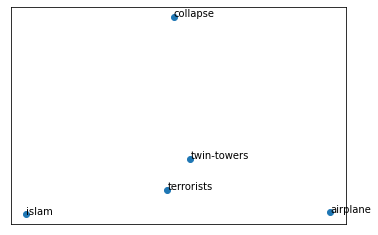

In [ ]:
context_var(['twin-towers', 'terrorists', 'collapse', 'airplane', 'islam'], slice_pre2001)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


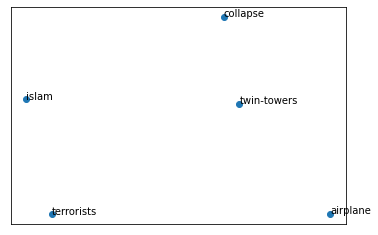

In [ ]:
context_var(['twin-towers', 'terrorists', 'collapse', 'airplane', 'islam'], slice_2016_2019)